In [114]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
!gcc pi.c -o pi

In [116]:

nthreads = [1, 2, 4, 6, 8, 12, 16, 32]
npoints = [10**i for i in range(1, 10)]
nruns = 10

df = pd.DataFrame(columns=["threads", "points",  "time"])
for nthread in nthreads:
    for npoint in npoints:
        total_t = 0
        for _ in range(nruns):
            process = subprocess.run(["./pi", str(nthread), str(npoint)], capture_output=True)
            pi, t = map(float, process.stdout.decode("utf-8").split(" "))
            total_t += t
        time = total_t / nruns

        df.loc[len(df)] = [nthread, npoint,  time]
        print(f"end time measurement for {nthread=:2d} {npoint=:11d} {time=:2.7f}")


end time measurement for nthread= 1 npoint=         10 time=0.0002080
end time measurement for nthread= 1 npoint=        100 time=0.0001866
end time measurement for nthread= 1 npoint=       1000 time=0.0002106
end time measurement for nthread= 1 npoint=      10000 time=0.0003524
end time measurement for nthread= 1 npoint=     100000 time=0.0018024
end time measurement for nthread= 1 npoint=    1000000 time=0.0159661
end time measurement for nthread= 1 npoint=   10000000 time=0.1511298
end time measurement for nthread= 1 npoint=  100000000 time=1.6747520
end time measurement for nthread= 1 npoint= 1000000000 time=15.7713095
end time measurement for nthread= 2 npoint=         10 time=0.0002345
end time measurement for nthread= 2 npoint=        100 time=0.0002112
end time measurement for nthread= 2 npoint=       1000 time=0.0002185
end time measurement for nthread= 2 npoint=      10000 time=0.0002747
end time measurement for nthread= 2 npoint=     100000 time=0.0010365
end time measuremen

In [117]:
pi_csv = "csv/pi_time.csv"
df = df.astype({"threads": int, "points": int})
df.to_csv(pi_csv)

[]

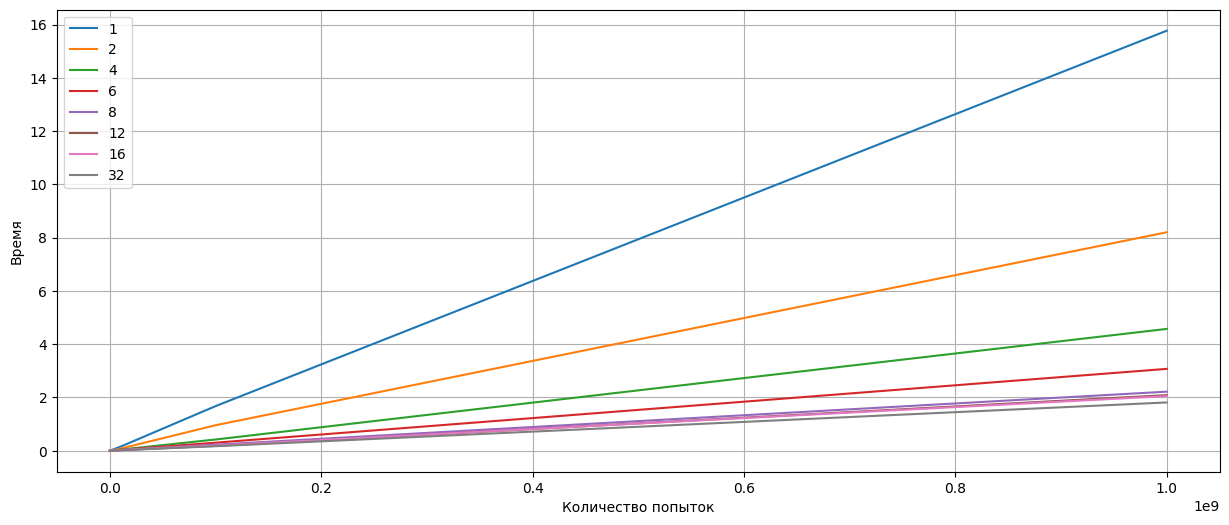

In [118]:
plt.figure(figsize=(15, 6))
plt.grid(True)
for threads in nthreads:
    mask = (df["threads"] == threads)
    plt.plot(df[mask]["points"], df[mask]["time"], label=f"{threads}")

plt.legend()
plt.xlabel("Количество попыток")
plt.ylabel("Время")
plt.plot()

In [167]:
!gcc mandelbrot.c -o mandelbrot -lm

In [162]:
!./mandelbrot 10 1000000

0.36223


In [168]:
dots = pd.read_csv("mandelbrot.csv")

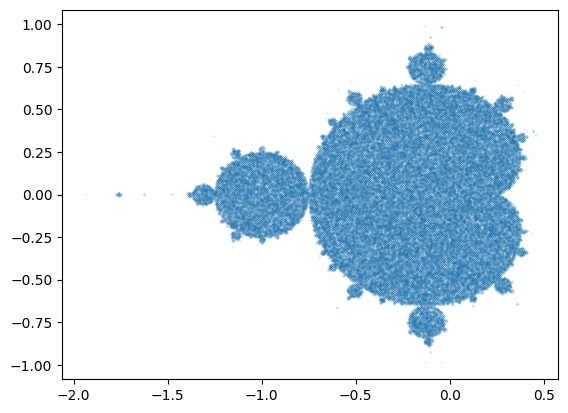

In [170]:
plt.scatter(dots["real"], dots["img"], s =0.01)

In [173]:
nthreads = [1, 2, 4, 6, 8, 12, 16, 32]
npoints = [10**i for i in range(1, 6)]
nruns = 10

df = pd.DataFrame(columns=["threads", "points",  "time"])
for nthread in nthreads:
    for npoint in npoints:
        total_t = 0
        for _ in range(nruns):
            process = subprocess.run(["./mandelbrot", str(nthread), str(npoint)], capture_output=True)
            t = float(process.stdout.decode("utf-8"))
            total_t += t
        time = total_t / nruns
        df.loc[len(df)] = [nthread, npoint, time]
    print(f"end time measurement for {nthread=:2d}")

end time measurement for nthread= 1
end time measurement for nthread= 2
end time measurement for nthread= 4
end time measurement for nthread= 6
end time measurement for nthread= 8
end time measurement for nthread=12
end time measurement for nthread=16
end time measurement for nthread=32


In [166]:
csv_mandelbrot = "csv/mandelbrot_time.csv"
df = df.astype({"threads": int, "points": int})
df.to_csv(csv_mandelbrot)

[]

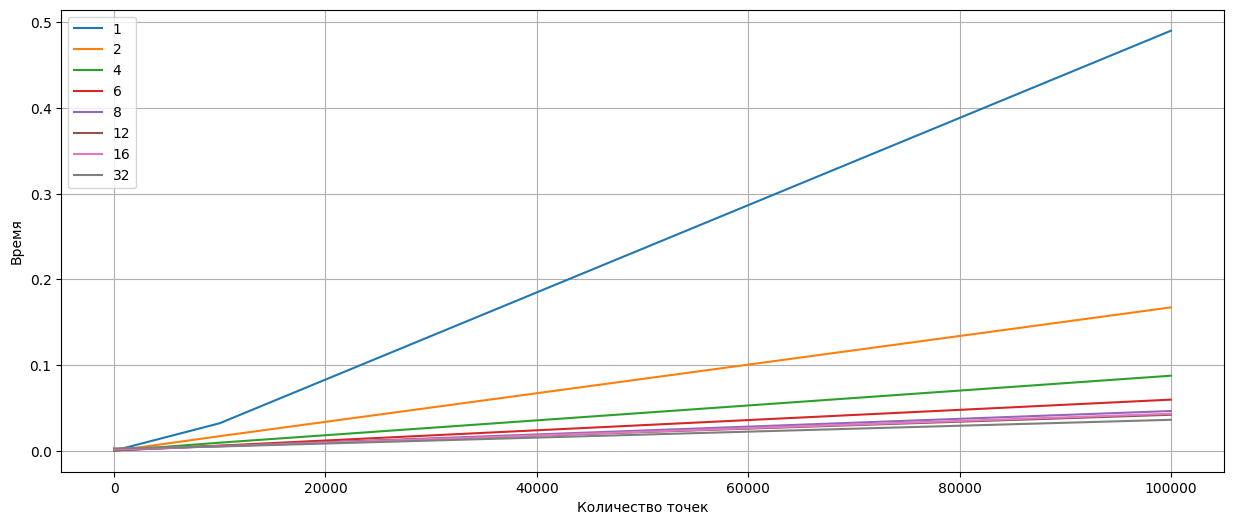

In [125]:
plt.figure(figsize=(15, 6))
plt.grid(True)
for threads in nthreads:
    mask = (df["threads"] == threads)
    plt.plot(df[mask]["points"], df[mask]["time"], label=f"{threads}")

plt.legend()
plt.xlabel("Количество точек")
plt.ylabel("Время")
plt.plot()

In [126]:
!gcc pth_ll_rwl.c my_rand.h my_rand.c -o pth_ll_rwl

In [127]:
!gcc pth_ll_rwl_readers.c my_rand.h my_rand.c rwlock_readers_prioretize.h -o pth_ll_rwl_readers

In [128]:
!gcc pth_ll_rwl_writers.c my_rand.h my_rand.c rwlock_writers_prioretize.h -o pth_ll_rwl_writers

In [129]:
np.linspace(0.1, 1, 10)
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [130]:
nthreads = [1, 2, 4, 6, 8, 12, 16, 32]
nkeys = [10**i for i in range(3, 5)]
# noperations = list(np.arange(0.5, 2.5, 0.5))
# noperations = [10**i for i in range(3, 5)]

def run_on(cmd: str):
    df = pd.DataFrame(columns=["threads", "keys", "operations", "searc", "insert", "time"])
    i = 0
    for keys in nkeys:
        for threads in nthreads:
            #for operations in noperations:
            for search_frac in list(np.linspace(0.1, 1, 10)):
                for insert_frac in list(np.linspace(0, np.round(1 - search_frac,2), int(11-10*search_frac))):
                    #ops = int(keys*operations)
                    ops = keys
                    search_frac = float(np.round(search_frac,2))
                    insert_frac = float(np.round(insert_frac, 2))
                    inp = f"{keys} {ops} {search_frac} {insert_frac}".encode()
                    run = subprocess.run([cmd, str(threads)], input=inp, capture_output=True)

                    t = float(run.stdout.decode())
                    df.loc[len(df)] = [threads, keys, ops, search_frac, insert_frac, t]
                    i += 1
                    if i % 100 == 0:
                        print(f"{threads=}; {keys=}\t{ops=}\t{search_frac=}\t{insert_frac=}")
                        df.to_csv(f"{cmd[2:]}.csv")

    
    df.to_csv(f"{cmd[2:]}.csv")

In [131]:
run_on("./pth_ll_rwl")
run_on("./pth_ll_rwl_writers")
run_on("./pth_ll_rwl_readers")

threads=2; keys=1000	ops=1000	search_frac=0.7	insert_frac=0.0
threads=6; keys=1000	ops=1000	search_frac=0.5	insert_frac=0.3
threads=12; keys=1000	ops=1000	search_frac=0.4	insert_frac=0.2
threads=32; keys=1000	ops=1000	search_frac=0.3	insert_frac=0.2
threads=2; keys=10000	ops=10000	search_frac=0.2	insert_frac=0.3
threads=6; keys=10000	ops=10000	search_frac=0.1	insert_frac=0.5
threads=8; keys=10000	ops=10000	search_frac=0.9	insert_frac=0.0
threads=16; keys=10000	ops=10000	search_frac=0.6	insert_frac=0.3


KeyboardInterrupt: 